In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
train='/kaggle/input/playground-series-s4e6/train.csv'
test='/kaggle/input/playground-series-s4e6/test.csv'
sample='/kaggle/input/playground-series-s4e6/sample_submission.csv'

df_train=pd.read_csv(train)
df_test=pd.read_csv(test)
df_sample=pd.read_csv(sample)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [133]:
display(df_train)
display(df_test)
display(df_sample)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate
...,...,...
51007,127525,Graduate
51008,127526,Graduate
51009,127527,Graduate
51010,127528,Graduate


In [134]:
df_train['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [135]:
df_sample['Target'].unique()

array(['Graduate'], dtype=object)

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [178]:
## encode target and take train test split
le = LabelEncoder()
df_train['Target'] = le.fit_transform(df_train['Target'])

display(df_train)

x= df_train.loc[:, df_train.columns != 'Target']
y=df_train['Target']
X_train,X_test, Y_train, Y_test= train_test_split(x,y,train_size=0.20,random_state=42)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,2
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,2
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,1
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,0


<Figure size 1000x800 with 0 Axes>

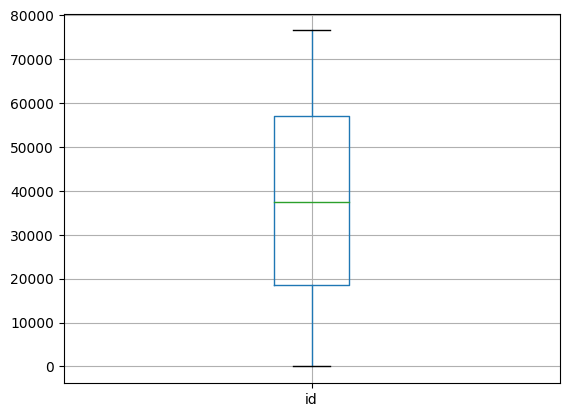

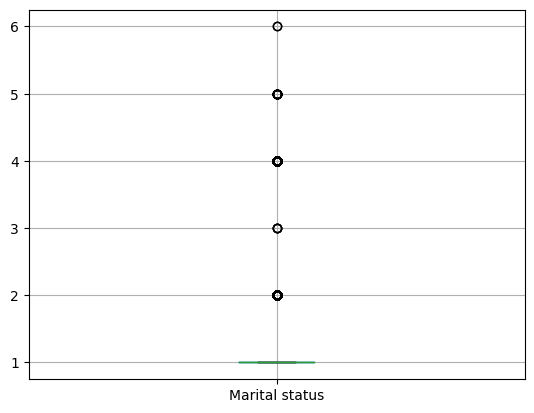

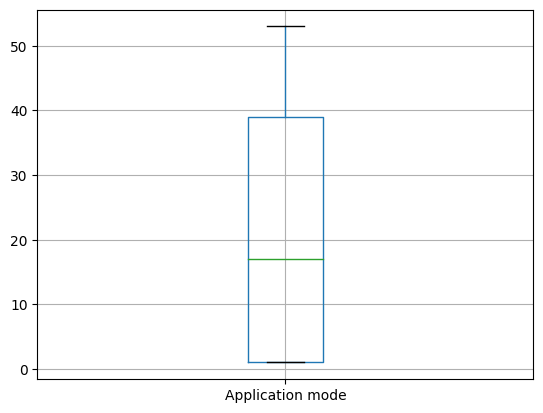

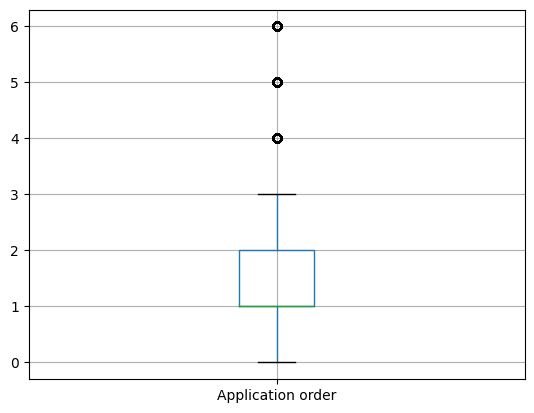

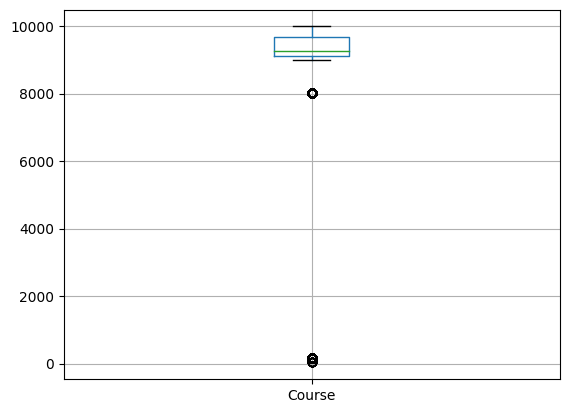

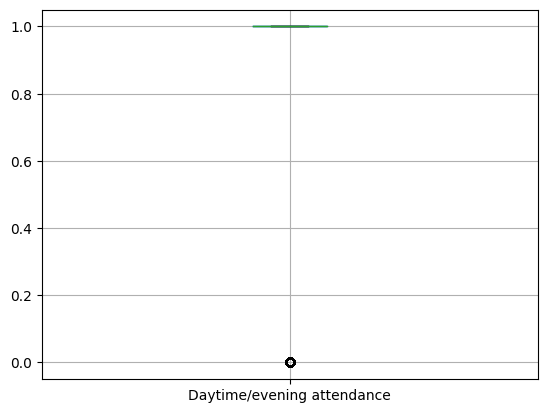

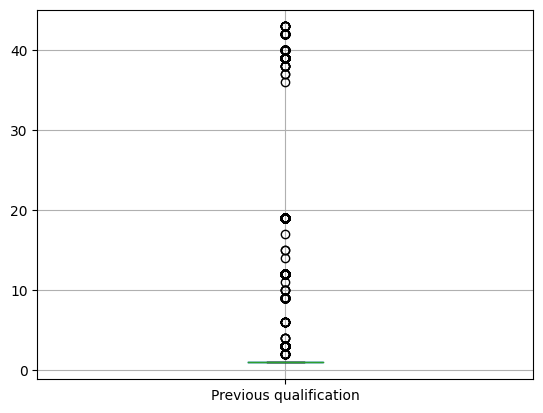

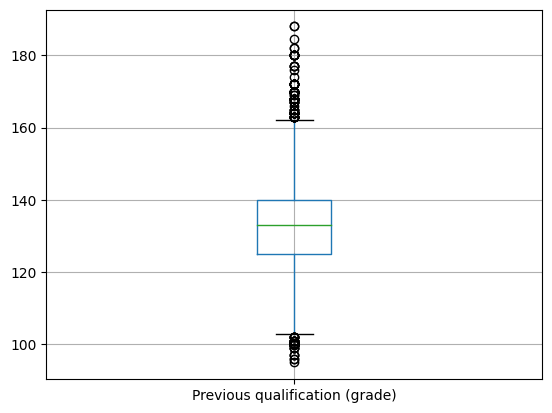

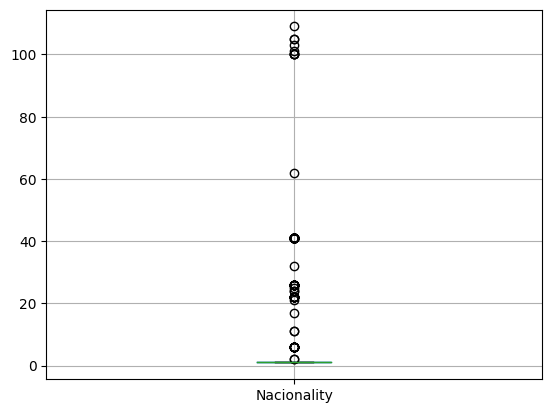

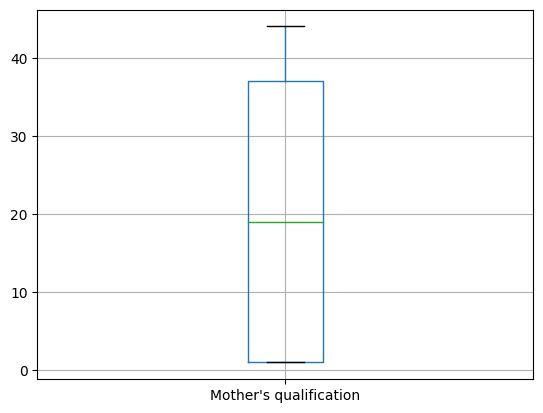

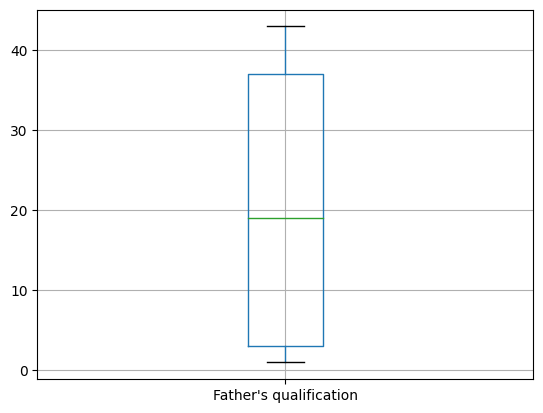

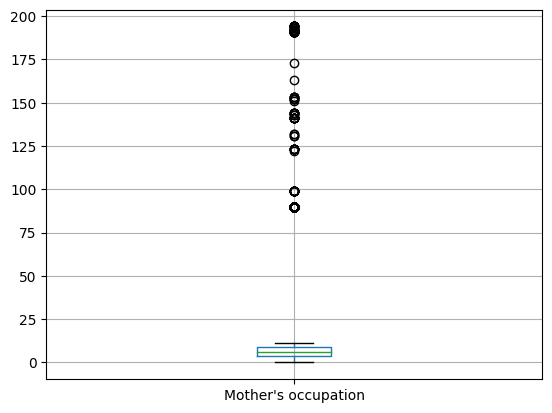

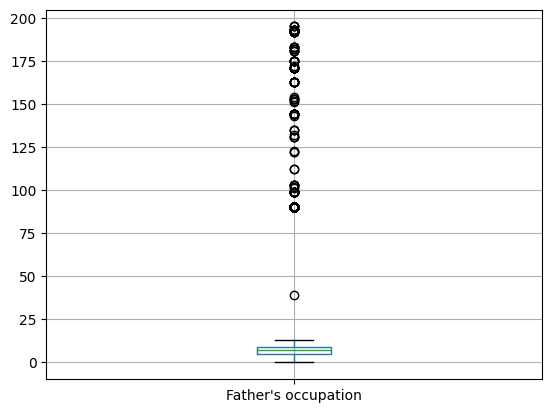

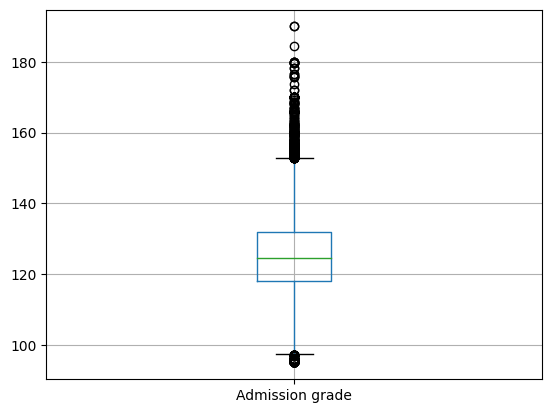

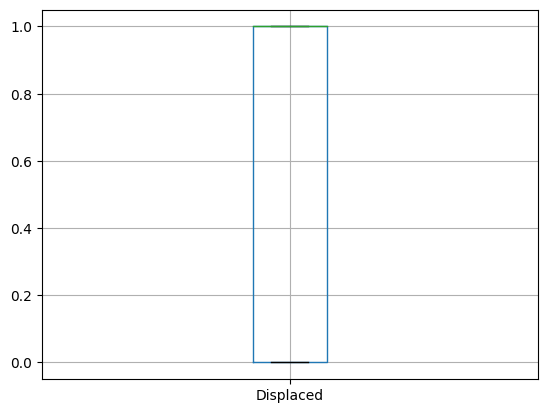

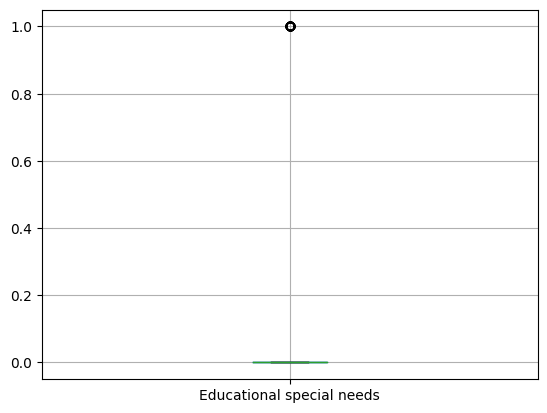

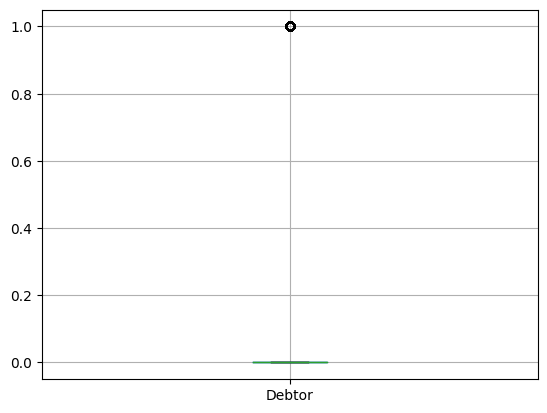

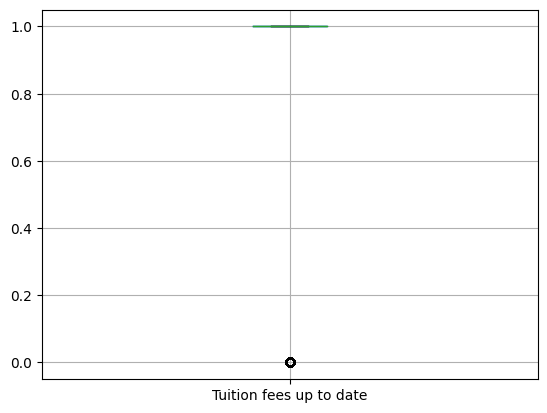

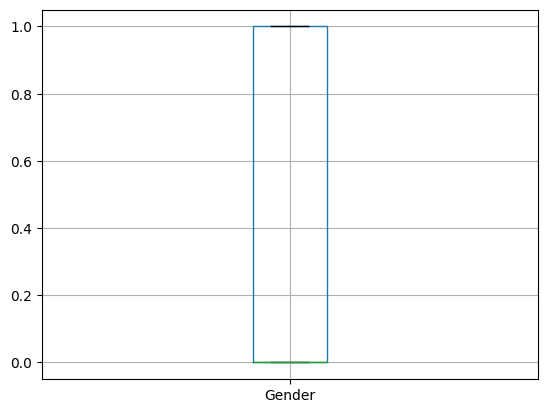

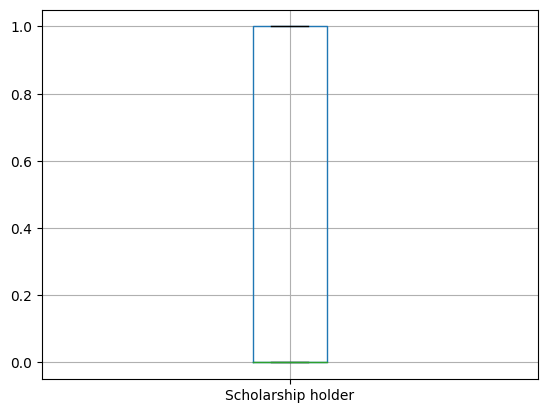

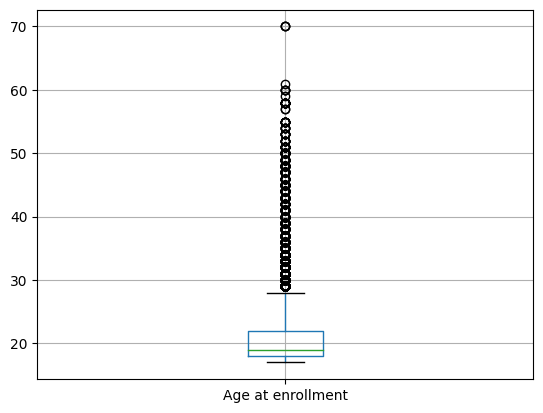

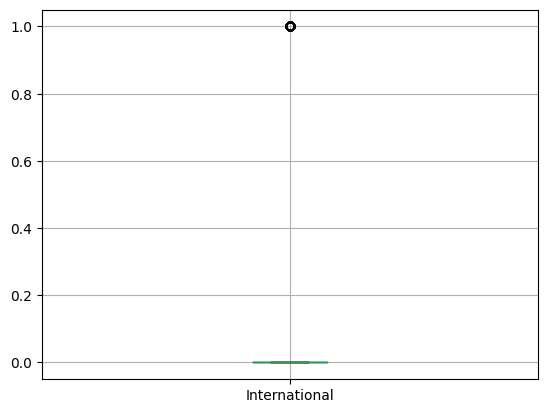

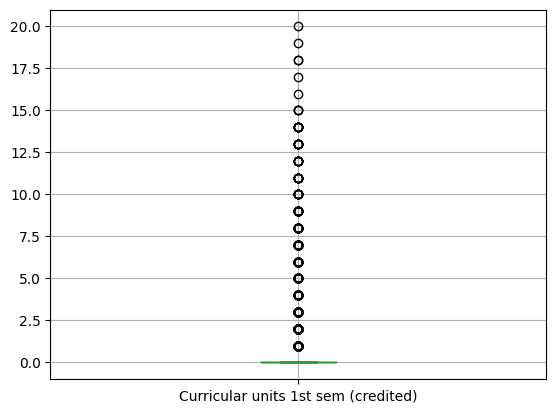

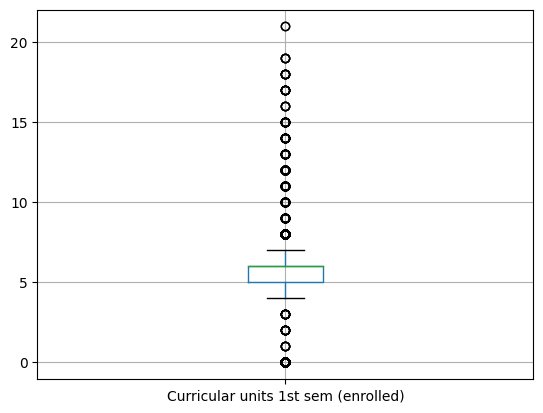

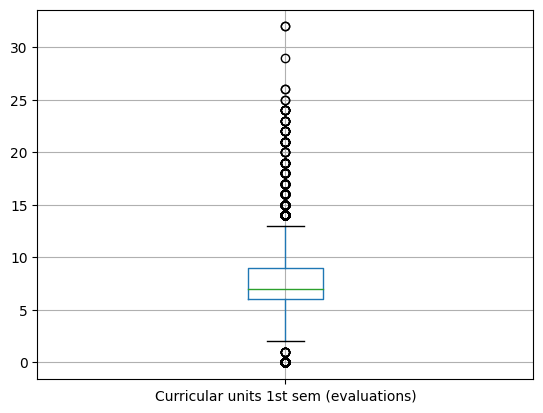

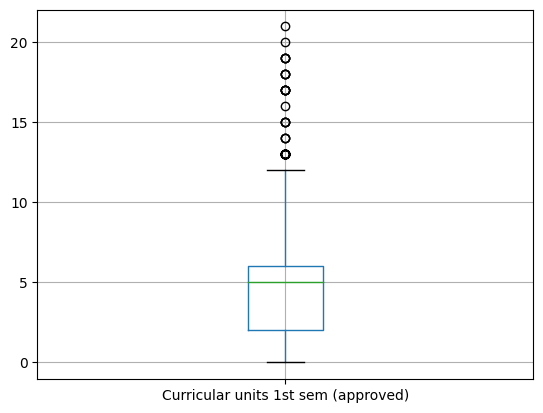

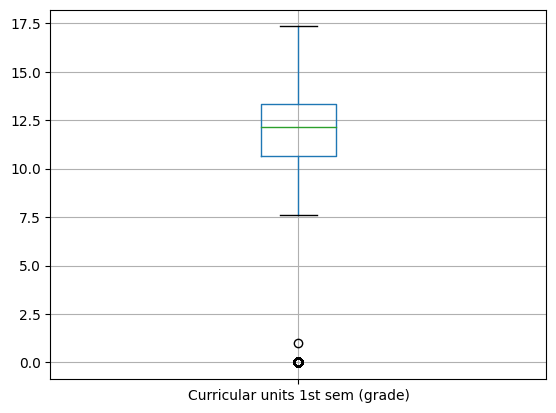

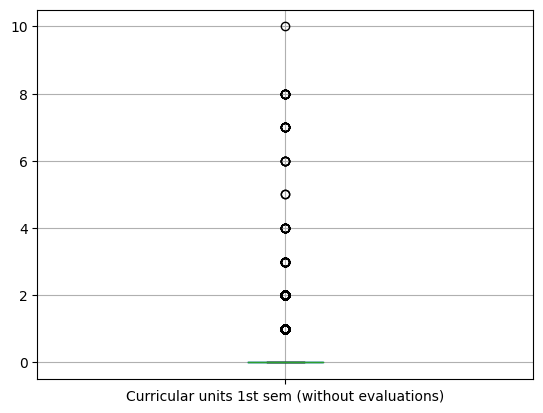

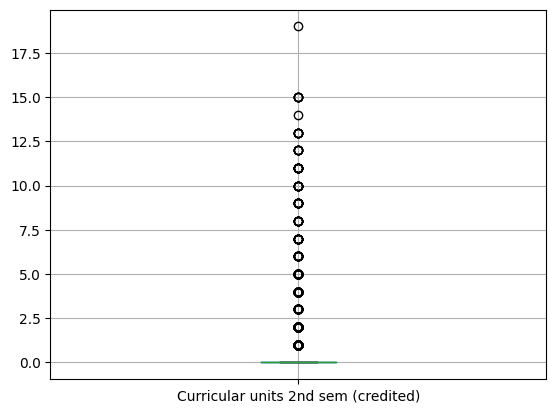

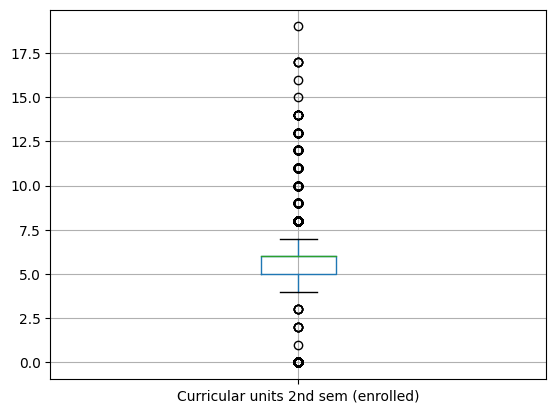

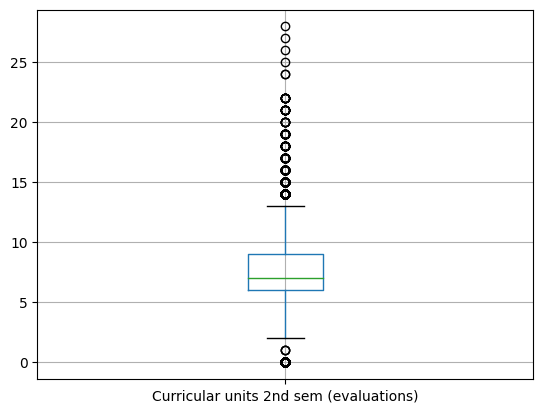

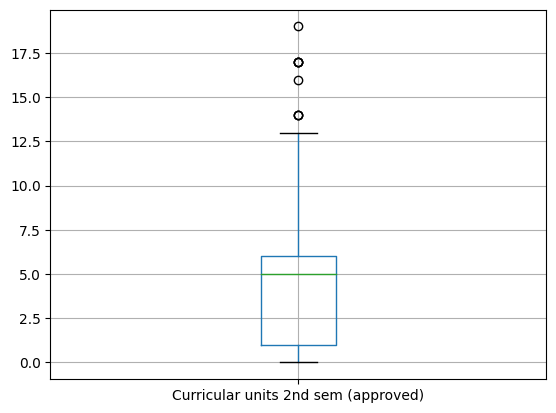

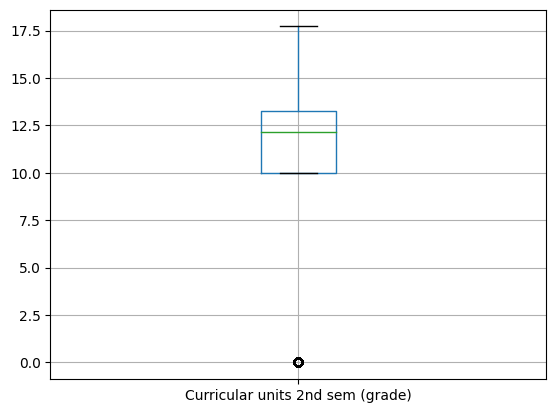

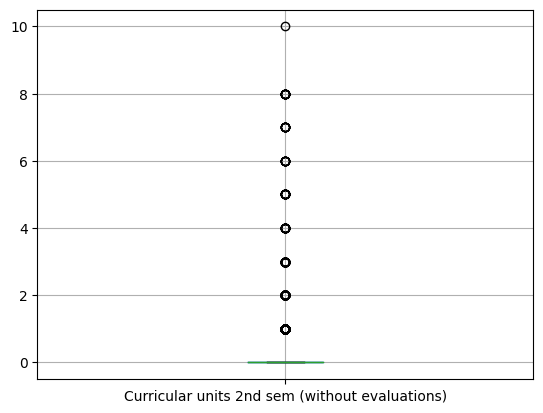

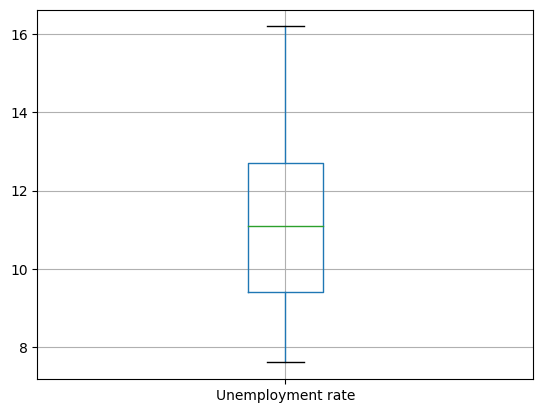

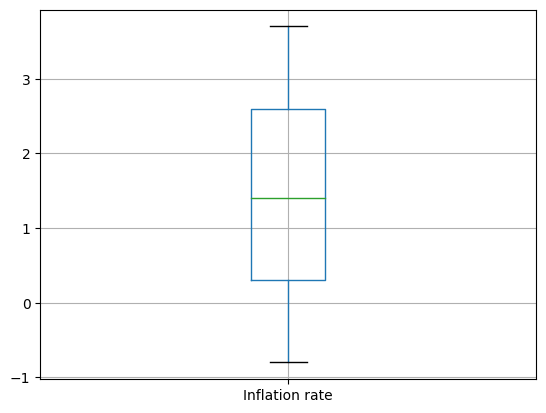

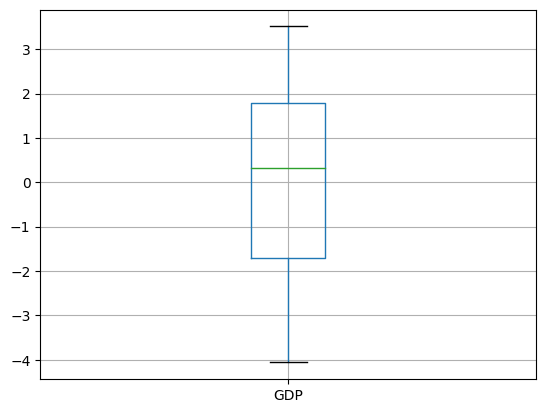

In [179]:
## check column distributions

plt.figure(figsize=(10, 8))
for column in X_train:
    plt.figure()
    X_train.boxplot([column])

In [180]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7360777587192682


In [82]:
## random forest

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'n_estimators': [100, 200, 300],            
    'max_features': ['sqrt', 'log2'],        
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4]             
}


rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  11.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  11.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  10.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

In [181]:
best_params

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [182]:
rf_classifier = RandomForestClassifier(**best_params)
rf_classifier.fit(X_train, Y_train)
Y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8203381524136241


In [183]:
Y_pred_rf

array([2, 0, 1, ..., 0, 2, 1])

In [184]:
## predict test data

Y_pred_rf = rf_classifier.predict(df_test)
predicted_df = pd.DataFrame(Y_pred_rf, columns=['Target_Encoded'])
predicted_df

,Target_Encoded
0,0
1,2
2,2
3,2
4,1
...,...
51007,0
51008,0
51009,0
51010,0


In [186]:
output_df = pd.concat([df_test, predicted_df], axis=1)


In [187]:
output_df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Encoded
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,8,0,0,0.000000,0,13.9,-0.3,0.79,0
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,6,6,6,13.500000,0,11.1,0.6,2.02,2
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,6,11,5,11.000000,0,15.5,2.8,-4.06,2
3,76521,1,44,1,9147,1,39,130.0,1,1,...,3,8,14,5,11.000000,0,8.9,1.4,3.51,2
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,6,9,4,10.666667,2,7.6,2.6,0.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0.000000,0,15.5,2.8,-4.06,0
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,0
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0.000000,0,15.5,2.8,-4.06,0
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,6,9,3,13.000000,0,7.6,2.6,0.32,0


In [188]:

target = le.inverse_transform(output_df['Target_Encoded'])
target


array([0, 2, 2, ..., 0, 0, 0])

In [189]:
output_df['Target']=target
display(output_df)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Encoded,Target
0,76518,1,1,1,9500,1,1,141.0,1,3,...,8,0,0,0.000000,0,13.9,-0.3,0.79,0,0
1,76519,1,1,1,9238,1,1,128.0,1,1,...,6,6,6,13.500000,0,11.1,0.6,2.02,2,2
2,76520,1,1,1,9238,1,1,118.0,1,1,...,6,11,5,11.000000,0,15.5,2.8,-4.06,2,2
3,76521,1,44,1,9147,1,39,130.0,1,1,...,8,14,5,11.000000,0,8.9,1.4,3.51,2,2
4,76522,1,39,1,9670,1,1,110.0,1,1,...,6,9,4,10.666667,2,7.6,2.6,0.32,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0.000000,0,15.5,2.8,-4.06,0,0
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,5,5,0,0.000000,0,9.4,-0.8,-3.12,0,0
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0.000000,0,15.5,2.8,-4.06,0,0
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,6,9,3,13.000000,0,7.6,2.6,0.32,0,0


In [190]:
final_output =output_df[['id','Target']]

In [192]:
display(final_output)

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,2
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,0


In [193]:
final_output.to_csv('submission.csv', index=False)